## Data visualization - COVID 19 death by age

In [1]:
import pandas as pd
import numpy as np
# import rapidjson as json

import matplotlib.pyplot as plt
import matplotlib.patches as patches # for drawing shapes
from matplotlib.lines import Line2D

%config InlineBackend.figure_format = 'retina'

## Spain

In [2]:
spain_death_by_age_group = {
    (0, 9): 0,
    (10, 19): 0,
    (20, 29): 0.1,
    (30, 39): 0.3,
    (40, 49): 1.1,
    (50, 59): 3.2,
    (60, 69): 8.9,
    (70, 79): 23.8,
    (80, 200): 41.2 + 21.5
}
sum(spain_death_by_age_group.values())

100.10000000000001

## Italy

In [3]:
italy_death_by_age_group = {
    (0, 9): 0,
    (10, 19): 0,
    (20, 29): 0,
    (30, 39): 0.2,
    (40, 49): 0.9,
    (50, 59): 3.5,
    (60, 69): 10.0,
    (70, 79): 26.2,
    (80, 200): 40.9 + 18.3
}
sum(italy_death_by_age_group.values())

100.0

## French

In [4]:
french_death_by_age_group_ratio = {(0, 9): 0.00014360938247965534,
 (10, 19): 0.00019147917663954044,
 (20, 29): 0.001292484442316898,
 (30, 39): 0.004786979415988511,
 (40, 49): 0.012781235040689325,
 (50, 59): 0.046768788894207755,
 (60, 69): 0.11876495931067496,
 (70, 79): 0.22455720440402105,
 (80, 200): 0.3719483006223073 + 0.21876495931067497
}

In [5]:
french_death_by_age_group = {k: v * 100 for (k, v) in french_death_by_age_group_ratio.items()}
french_death_by_age_group

{(0, 9): 0.014360938247965534,
 (10, 19): 0.019147917663954045,
 (20, 29): 0.1292484442316898,
 (30, 39): 0.47869794159885115,
 (40, 49): 1.2781235040689325,
 (50, 59): 4.676878889420776,
 (60, 69): 11.876495931067495,
 (70, 79): 22.455720440402104,
 (80, 200): 59.07132599329823}

In [6]:
sum(french_death_by_age_group.values())

100.0

## United States

In [7]:
us_death_by_age_group_ratio = {(0, 9): 0.0003497059291050707,
 (10, 19): 0.0005722460658082976,
 (20, 29): 0.004466698458114767,
 (30, 39): 0.012859640756636466,
 (40, 49): 0.03157685582578287,
 (50, 59): 0.0820139882371642,
 (60, 69): 0.1689874423780003,
 (70, 79): 0.24492131616595136,
 (80, 200): 0.4544905420441901}

In [8]:
us_death_by_age_group = {k: v * 100 for (k, v) in us_death_by_age_group_ratio.items()}

In [9]:
sum(us_death_by_age_group.values())

100.02384358607534

## United Kindom (England and Wales) (Not including Scotland and Northern Ireland)

In [10]:
uk_death_count = {
    (0, 9): 2 + 0 + 1,
    (10, 19): 3 + 9,
    (20, 29): 26 + 49,
    (30, 39): 87 + 139,
    (40, 49): 265 + 486,
    (50, 59): 887 + 1511,
    (60, 69): 2145 + 2929,
    (70, 79): 4821 + 6990,
    (80, 89): 10008 + 10741,
    (90, 200): 11415
}

In [11]:
uk_death_sum = sum([item for item in uk_death_count.values()])
uk_death_sum

52514

In [12]:
uk_death_by_age_group_ratio = {k:(v * 1.0 / uk_death_sum) for (k, v) in uk_death_count.items()}
uk_death_by_age_group_ratio

{(0, 9): 5.71276231100278e-05,
 (10, 19): 0.0002285104924401112,
 (20, 29): 0.0014281905777506951,
 (30, 39): 0.004303614274288761,
 (40, 49): 0.014300948318543626,
 (50, 59): 0.04566401340594889,
 (60, 69): 0.09662185322009369,
 (70, 79): 0.22491145218417946,
 (80, 89): 0.39511368396998897,
 (90, 200): 0.21737060593365579}

In [13]:
uk_death_by_age_group_ratio = {(0, 9): 5.71276231100278e-05,
 (10, 19): 0.0002285104924401112,
 (20, 29): 0.0014281905777506951,
 (30, 39): 0.004303614274288761,
 (40, 49): 0.014300948318543626,
 (50, 59): 0.04566401340594889,
 (60, 69): 0.09662185322009369,
 (70, 79): 0.22491145218417946,
 (80, 200): 0.39511368396998897 + 0.21737060593365579
}

In [14]:
uk_death_by_age_group = {k: v * 100 for (k, v) in uk_death_by_age_group_ratio.items()}

In [15]:
sum(uk_death_by_age_group.values())

100.0

## Plot 

In [16]:
# Prepare data
countries = ['United States', 'Italy', 'Britain*', 'Franch', 'Spain']
color_labels = ['#BF1725', '#85B9BF', '#2A858C', '#C0C3C6', '#E8F0F4'] # ['#E8F0F4', '#FEEDD5', '#FFC483', '#FF8053', '#E63E31']
death_by_age_group = {}
for k in us_death_by_age_group:
    label = str(k[0]) + '-' + str(k[1]) if k[0] != 80 else '80+'
    death_by_age_group[label] = [
        {"country": countries[0], "count": us_death_by_age_group[k], "color": color_labels[0]},
        {"country": countries[1], "count": uk_death_by_age_group[k], "color": color_labels[1]},
        {"country": countries[2], "count": french_death_by_age_group[k], "color": color_labels[2]},
        {"country": countries[3], "count": italy_death_by_age_group[k], "color": color_labels[3]},
        {"country": countries[4], "count": spain_death_by_age_group[k], "color": color_labels[4]}
    ]

death_by_age_group = [{'label': k, 'data': sorted(v, key=lambda x: x['count'])} for (k, v) in death_by_age_group.items()][::-1]
min_death_by_age_group = [
    min([data['count'] for data in group['data']])
    for group in death_by_age_group
]
max_death_by_age_group = [
    max([data['count'] for data in group['data']])
    for group in death_by_age_group
]

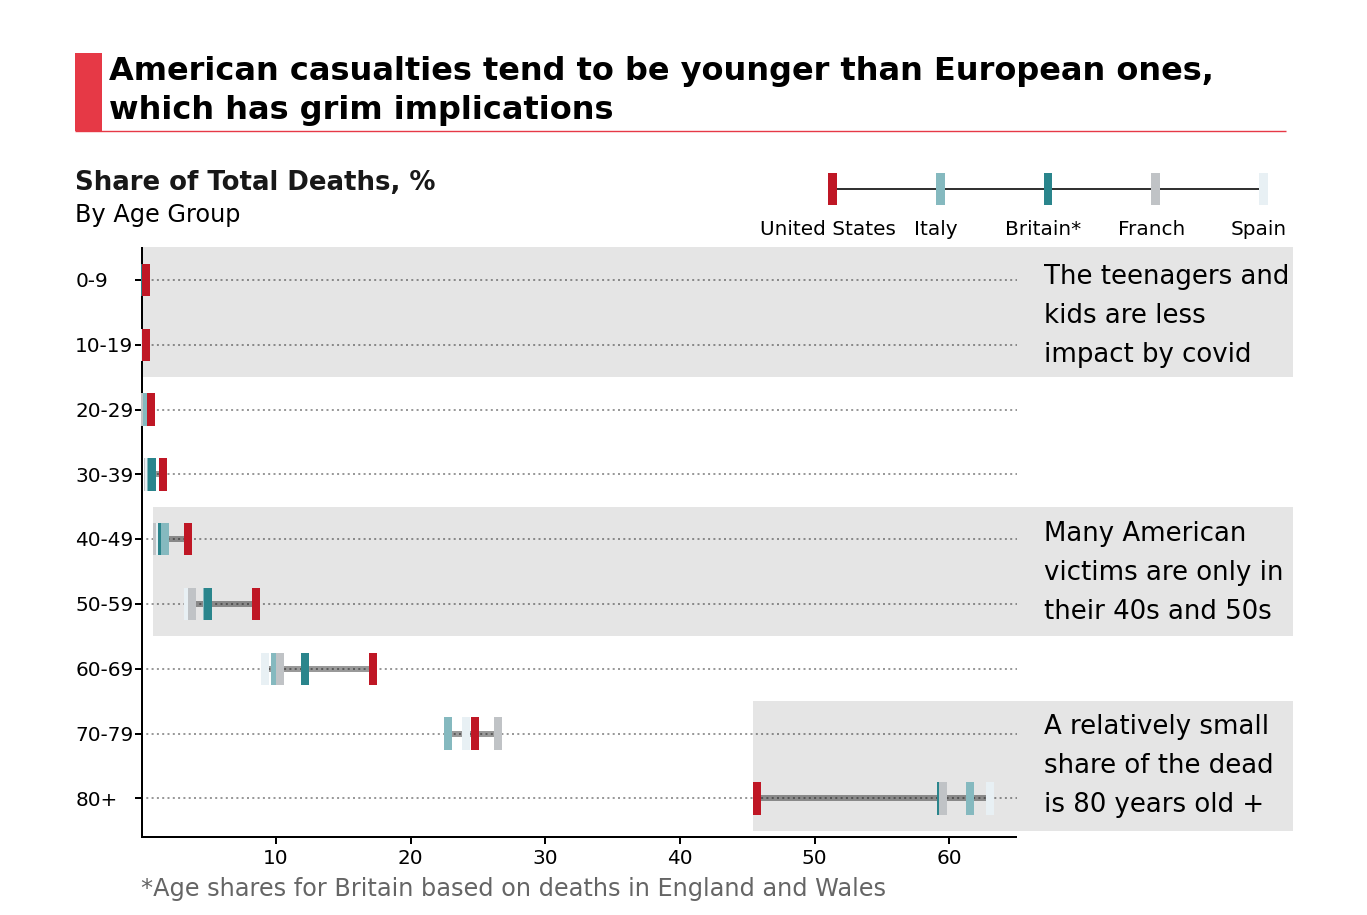

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')

# Global Parameters
title_left_align = -4.9
main_bar_size = [0.6, 0.5]

xlimit = [0.0001, 90]
ylimit = [-main_bar_size[0] - 0.5, len(death_by_age_group) - 0.5]

[ax.spines[item].set_visible(False) for item in ['top', 'left', 'right', 'bottom']]
ax.get_xaxis().set_visible(False)

# Main Title
main_title_pos = [title_left_align+2.5, len(death_by_age_group) + 2.1]
ax.text(main_title_pos[0], main_title_pos[1], 
        'American casualties tend to be younger than European ones,', 
        fontdict={'size': 16, 'weight': 'bold'})
main_title_pos_2 = [title_left_align+2.5, len(death_by_age_group) + 1.5]
ax.text(main_title_pos_2[0], main_title_pos_2[1], 
        'which has grim implications', 
        fontdict={'size': 16, 'weight': 'bold'})

title_rect = patches.Rectangle(xy=(title_left_align, len(death_by_age_group)+1.3), width=2, height=1.2,
                             facecolor='#e63946')
ax.add_patch(title_rect)
ax.hlines(len(death_by_age_group)+1.3, title_left_align, 85 ,lw=0.7, color='#e63946')

# Second Title
title_pos = [title_left_align, len(death_by_age_group) + 0.4]
ax.text(title_pos[0], title_pos[1], 'Share of Total Deaths, %', 
        fontdict={'size': 13, 'weight': 'bold'}, alpha=0.9)

subtitle_pos = [title_left_align, len(death_by_age_group) - 0.1]
ax.text(subtitle_pos[0], subtitle_pos[1], 'By Age Group', 
        fontdict={'size': 12})

# Right Legend
legend_line_pos = title_pos[1] 
legend_x_begin = 51
legend_interval = 8
legend_x_end = legend_x_begin + legend_interval * (len(countries) - 1)

ax.hlines([legend_line_pos], [legend_x_begin], [legend_x_end], color='black', alpha=0.8, linewidth=1)
for i, pos in enumerate(range(legend_x_begin, legend_x_end + 1, legend_interval)):
    rect = patches.Rectangle(xy=(pos, legend_line_pos - 0.25), 
                         width=0.65, height=0.5, 
                         facecolor=color_labels[i], linewidth=0, edgecolor="white", zorder=10)
    ax.add_patch(rect)

for i, x in enumerate(range(legend_x_begin, legend_x_end + 1, legend_interval)):
    ax.text(x, legend_line_pos - 0.7, countries[i], ha='center')

# Main Bar
for i, group in enumerate(death_by_age_group):
    for data in group['data']:
        rect = patches.Rectangle(xy=(data['count'], i - 0.25), width=main_bar_size[0], height=main_bar_size[1], 
                                 facecolor=data['color'], linewidth=0, edgecolor="white", zorder=10)
        ax.add_patch(rect)

# Main Lines
dashes = ax.hlines([item['label'] for item in death_by_age_group], 
                   [item for item in min_death_by_age_group],
                   [item for item in max_death_by_age_group],
                   color='black', alpha=0.4, linewidth=3)

# Background Lines
dashes = ax.hlines([item['label'] for item in death_by_age_group], 
                   [0 for item in min_death_by_age_group],
                   [65 for item in max_death_by_age_group],
                   color='black', alpha=0.4, linewidth=1, ls='dotted')

# Background Bar
background_bar_limit = 85.5

teens_data = death_by_age_group[8]['data'][0]
rect = patches.Rectangle(xy=(teens_data['count'], 7 - main_bar_size[1]), 
                         width=background_bar_limit - (teens_data['count']), height=main_bar_size[1] + 1.5, 
                         facecolor='black', linewidth=0, edgecolor="white", zorder=5, alpha = 0.1)
ax.add_patch(rect)    

fourties_data = death_by_age_group[4]['data'][0]
max_data = group['data'][-1]
rect = patches.Rectangle(xy=(fourties_data['count'], 3 - main_bar_size[1]), 
                         width=background_bar_limit - (fourties_data['count']), height=main_bar_size[1] + 1.5, 
                         facecolor='black', linewidth=0, edgecolor="white", zorder=5, alpha = 0.1)
ax.add_patch(rect)
    
eighties_data = death_by_age_group[0]['data'][0]
rect = patches.Rectangle(xy=(eighties_data['count'], -1 + main_bar_size[1]), 
                         width=background_bar_limit - (eighties_data['count']), height=2, 
                         facecolor='black', linewidth=0, edgecolor="white", zorder=5, alpha = 0.1)
ax.add_patch(rect)

# Right Text
right_text_pos = [67, 7.95]
ax.text(right_text_pos[0], right_text_pos[1], 'The teenagers and',
            fontdict={'size': 13}, color='black')
ax.text(right_text_pos[0], right_text_pos[1] - 0.6, 'kids are less',
            fontdict={'size': 13}, color='black')
ax.text(right_text_pos[0], right_text_pos[1] - 1.2, 'impact by covid',
            fontdict={'size': 13}, color='black')

# Right Text 2
right_text_pos = [67, 3.98]
ax.text(right_text_pos[0], right_text_pos[1], 'Many American',
            fontdict={'size': 13}, color='black')
ax.text(right_text_pos[0], right_text_pos[1] - 0.6, 'victims are only in',
            fontdict={'size': 13}, color='black')
ax.text(right_text_pos[0], right_text_pos[1] - 1.2, 'their 40s and 50s',
            fontdict={'size': 13}, color='black')

# Right Text 3
right_text_pos = [67, 1]
ax.text(right_text_pos[0], right_text_pos[1], 'A relatively small',
            fontdict={'size': 13}, color='black')
ax.text(right_text_pos[0], right_text_pos[1] - 0.6, 'share of the dead',
            fontdict={'size': 13}, color='black')
ax.text(right_text_pos[0], right_text_pos[1] - 1.2, 'is 80 years old +',
            fontdict={'size': 13}, color='black')

# Axis
yaxis = ax.vlines([0.02], ylimit[0] + 0.5, ylimit[1], color='black', linewidth=1)
yticks = ax.hlines(range(len(death_by_age_group)),
                   [xlimit[0] - 0.5 for i in range(len(death_by_age_group))], 
                   [xlimit[0] + 0 for i in range(len(death_by_age_group))], color='black', linewidth=1)
for i in range(len(death_by_age_group)):
    ax.text(title_left_align, i - 0.1, death_by_age_group[i]['label'])

xaxis = ax.hlines([ylimit[0] + 0.5], [0], [65], color='black', linewidth=1)
xticks = ax.vlines(range(10, 61, 10),
                   [ylimit[0] + 0.5 for i in range(6)], 
                   [ylimit[0] + 0.4 for i in range(6)], color='black', linewidth=1)
for i in range(10, 61, 10):
    ax.text(i, ylimit[0] + 0.1, str(i), ha='center')

# Bottom
title_pos = [0, -1.5]
ax.text(title_pos[0], title_pos[1], '*Age shares for Britain based on deaths in England and Wales',
        fontdict={'size': 12}, color='black', alpha = 0.6)


plt.show()